In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df_index = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# i don't need the Unnamed: 0, year, month columns that's i have to drop that and based on inerest_rate
# and unemployment_rate i will predict the index_price
df_index.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
# check the null value
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [8]:
## lets do some visualization
import seaborn as sns

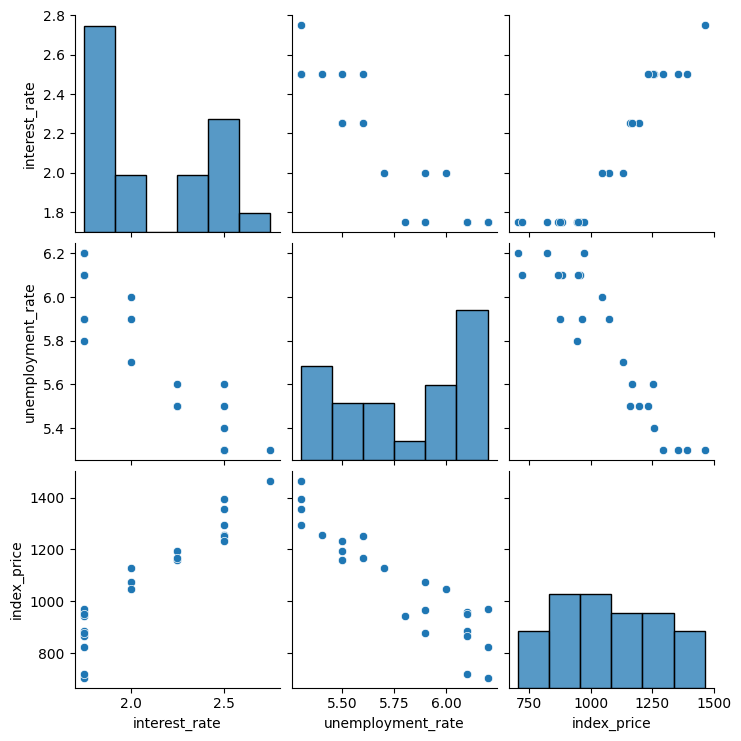

In [9]:
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

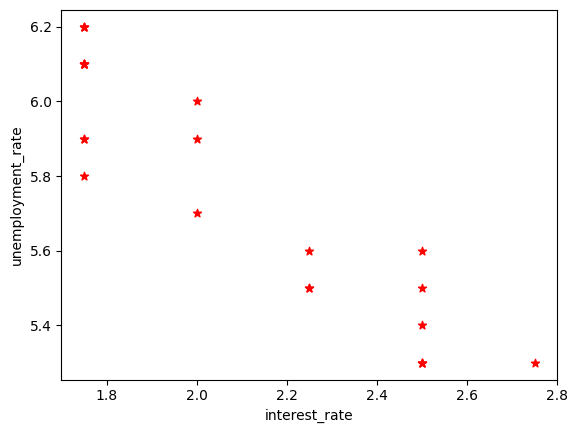

In [12]:
## Visualize data point also
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color = 'red',marker='*')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [14]:
# Identify the dependent and independent features 
X = df_index.iloc[:,:-1] #:,:-1 means that all the features except the last one  
# below one is also okay
#X = df_index[['interest_rate'],['unemployment_rate']]
Y = df_index.iloc[:,-1]

In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
Y 

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
# Now do test train split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

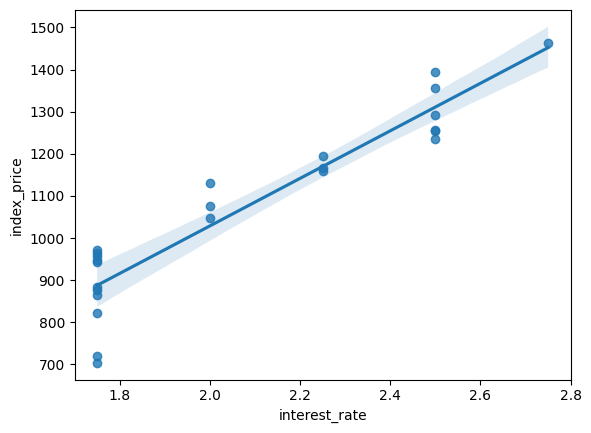

In [20]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

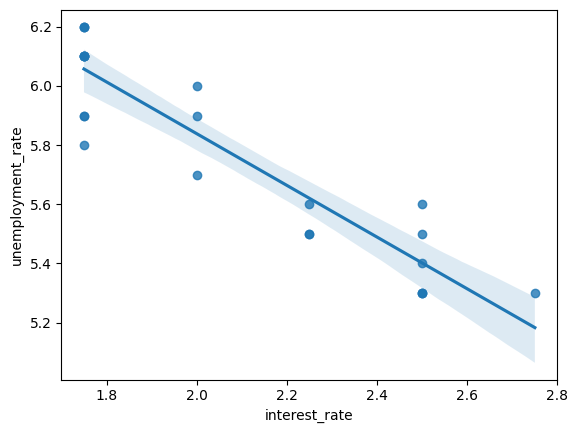

In [21]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

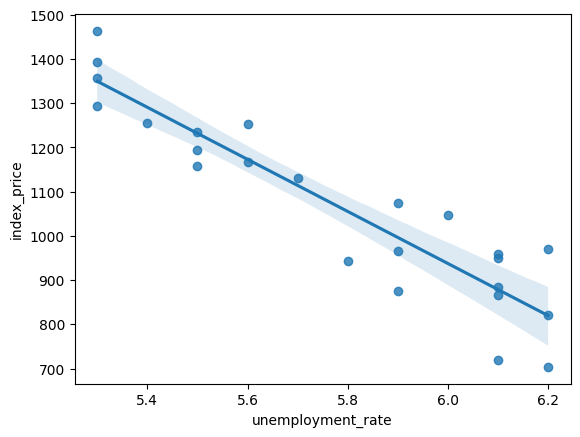

In [22]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

In [24]:
# Now standarized the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [26]:
# Now apply Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [27]:
regression.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
## Cross_Validation_Score It involves splitting your dataset into smaller subsets 
# to test how well your model performs on unseen data. This process ensures your model 
# doesn't just memorize patterns but learns to generalize effectively.
from sklearn.model_selection import cross_val_score
validationScore = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',
                    cv=3)

In [30]:
validationScore

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [31]:
np.mean(validationScore)

np.float64(-5914.8281801623925)

In [32]:
## Predication
y_pred = regression.predict(X_test)

In [33]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [34]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306607
73.80444932337097
90.04758423359623


In [36]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.7591371539010257


In [37]:
print(1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.5985619231683761


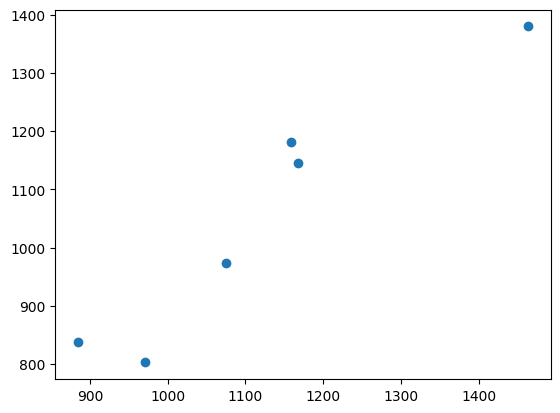

In [38]:
## Assumptions
plt.scatter(Y_test,y_pred)

In [41]:
residuals = Y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


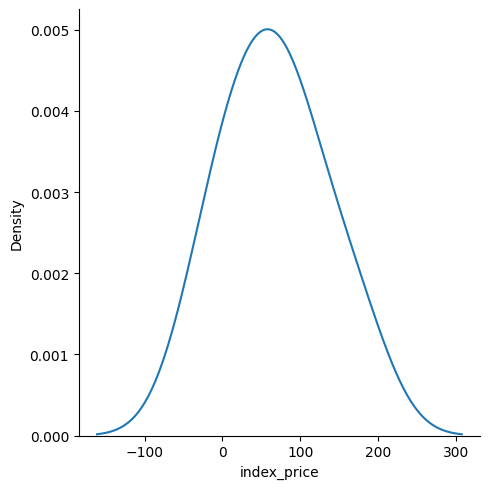

In [ ]:
sns.displot(residuals,kind='kde')
# so the following graph shows that our model is good

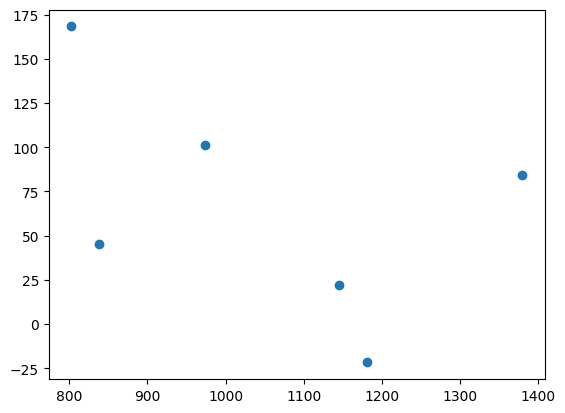

In [43]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
# the following gragh does't have any sepecfic pattern so its mean this is okay and if follows some 
# specfic pattern then there will be something wrong 


In [46]:
## OLS
import statsmodels.api as sm

In [47]:
model = sm.OLS(Y_train,X_train).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 10 Jan 2026   Prob (F-statistic):                       0.754
Time:                        22:24:59   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Now compare with regression
print(regression.coef_) # both should be same

[  88.27275507 -116.25716066]


In [52]:
df_index.head(15)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [53]:
newInterestRate = float(input("Enter Your Interest Rate"))
newUnemployedRate = float(input("Enter Unemployeed rate"))
newPredictPrice = [[newInterestRate,newUnemployedRate]]
userDataScaled = scaler.transform(newPredictPrice)
print("New Price Rate is = ",regression.predict(userDataScaled))

New Price Rate is =  [1162.2762203]


/Users/interlink/Desktop/ML_PYTHON_01/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
